> ### EEE4423: Deep Learning Lab

# LAB \#5: Low-level vision: FSRCNN

<h4><div style="text-align: right"> Due date: April 07, 2023.  </div> <br>
<div style="text-align: right"> Please upload your file @ LearnUs by 9 AM in the form of [Name_ID_lab5.ipynb]. </div></h4>

### *Instructions:*
- Write a program implementing a particular algorithm to solve a given problem.   
- <span style="color:red">**Report and discuss your results. Analyze the algorithm, theoretically and empirically.**</span> 
- Each team must write their own answers and codes (<span style="color:red">**if not you will get a F grade**</span>).

<h2><span style="color:blue">[2018142102] [Euijin Hong]</span> </h2>

In [ ]:
import datetime
print("This code is written at " + str(datetime.datetime.now()))

This code is written at 2023-03-31 03:43:07.994143


## Super-resolution with CNN

### 1. What is super-resolution?

> **Image super-resolution is a technique which enhances an image quality in terms of spatial resolution.**
> 
> 1. **Low Resolution (LR) Image** : Pixel density within an image is small, hence it offers few details.
> 2. **High Resolution (HR) Image** : Pixel density within an image is large, hence it offers a lot of details.
>
> **Super-resolution** reconstructs a high-resolution image (with restored details) from a low-resolution image.

<img src="https://docs.google.com/uc?export=download&id=1gBsghghJw7JTeRhp3D2drGqLsOtnVTri" alt="no_image" style="width: 900px;"/>

### 2. Why deep learning?

> **Learning based methods outperform simple interpolations or hand-designed methods.**
>
> 1. **Simple Interpolations** : Easy to implement (e.g., bicubic), but give poor visual quality, since the details are hard to be preserved.
> 2. **Hand-designed methods** : Involve several steps (e.g., sparse coding and dictionary learning), but not all of them can be optimized.
> 3. **Deep learning (CNN)** : Steps in the hand-designed methods can be combined into one big step with all of its parts being optimizable.
> 
<img src="https://docs.google.com/uc?export=download&id=1cDMjb9MWBzk4QvNDgQfSs94NfXacTKem" alt="no_image" style="width: 900px;"/>

### 3. SRCNN and FSRCNN

> **One of the pioneering works using CNNs to solve the super-resolution task.**
> 
> 1. **SRCNN**
>> - Starts with a bicubic-upsampled image.
>> - Convolutions are performed to improve a quality of the image.
>
> 2. **FSRCNN**
>> - Starts with a low-resolution image. (Hence faster.)
>> - Convolutions are performed in low-resolution spaces followed by a deconvolution which enhances spatial resolution.
>
>
> 

<img src="https://docs.google.com/uc?export=download&id=1vARLxgJpZjSebNn64Tj82gavEO31upGH" alt="no_image" style="width: 900px;"/>

### 4. Deconvolution ($\equiv$Transposed Convolution)
> 1. **How to do deconvolution?**
>> <table><tr>
>> <td> <img src="https://docs.google.com/uc?export=download&id=1Yp507Xsmeo4Pv_lhw-3ZFuswc5gykc6z" alt="no_image" style="width: 400px;"/> </td>
>> <td> <img src="https://docs.google.com/uc?export=download&id=1070666mtaV6DhlfpDm4Z4a9KUtwPe1Pm" alt="no_image" style="width: 400px;"/> </td>
>> </tr></table>
>>
>> Given a $4\times4$ input, we can generate a $6\times6$ output by using a $3\times3$ filter. <br>
>> (Blue plane : Input feature map.  //  Green plane : Output feature map.) <br>
>> **Warning! : It is not an actual deconvolution!** It just mimics the deconvolution by filter learning. <br>
>> (We suggest you to use the terminology **"transposed convolution"** instead.)
>
> 2. **Why is it called as transposed convolution?**
>> <table><tr>
>> <td> <img src="https://docs.google.com/uc?export=download&id=17iV0lLh1BOf6pvndoYdp1LDdi-2cQk6k" alt="no_image" style="width: 400px;"/> </td>
>> <td> <img src="https://docs.google.com/uc?export=download&id=1azGuyIfrpIGbLJwgtO9qtpmL_ph_8Hbg" alt="no_image" style="width: 400px;"/> </td>
>> </tr></table>
>>
>> In order to generate a single pixel in the output, the input pixels are aggregated by **flipped** version of the filter (see the difference between left & right figures above).
>>
>> <font color="green"> The reason why we call convolving with **flipped** filter as a **transposed** convolution is described here: <br>
>> https://towardsdatascience.com/up-sampling-with-transposed-convolution-9ae4f2df52d0. <br>
>> TL;DR : When we define a convolution operation by a matrix multiplication between a filter matrix and an input vector, then going backward (i.e., generating an input from an output) can be expressed by a matrix multiplication between **transpose** of the filter matrix and an output vector. </font>
>
> 3. **How to interpret it as a convolution?**
>> <table><tr>
>> <td> <img src="https://docs.google.com/uc?export=download&id=1tpm6yJ3BKUNnqxlN-5NQjVbS_RXGjl8A" alt="no_image" style="width: 400px;"/> </td>
>> <td> <img src="https://docs.google.com/uc?export=download&id=1AGbz3sH8AXtUI8fJQQNtkMYCqsKeVb1s" alt="no_image" style="width: 400px;"/> </td>
>> </tr></table>
>>
>> `Conv2d` with **flipped** filter, given that **(filter size - 1) zeros are padded along borders** <br>$\equiv$ `ConvTranspose2d` with **no padding**
>
> 4. **Then, what does the padding mean in the transposed convolution?**
>> <img src="https://docs.google.com/uc?export=download&id=17XWdjYc4zlvVuKgKITSHg-k-t9aFkRgc" alt="no_image" style="width: 850px;"/>
>> It is not an actual padding. It works reversely, that is, it decreases the spatial size of the output.
>>
>> <font color="green"> Note. On the other hand, the argument `output_padding` in `ConvTranspose2d` increases the spatial size of the output. <br>
>> See https://pytorch.org/docs/master/nn.html#torch.nn.ConvTranspose2d for details. </font>
>
> 5. **Lastly, how does a stride work in the transposed convolution?**
>> <table><tr>
>> <td> <img src="https://docs.google.com/uc?export=download&id=1OXw1wpJu3h0-KBhIaJOrPkCM_AvcK97s" alt="no_image" style="width: 400px;"/> </td>
>> <td> <img src="https://docs.google.com/uc?export=download&id=1Z6LswMASPdCyKqTJbi8zf9MCQp4n5WX7" alt="no_image" style="width: 400px;"/> </td>
>> </tr></table>
>>
>> The stride is applied on the output space. It mainly determines a factor of increasing. <br>
>> We can interpret it as a `Conv2d` with **flipped** filter, given that **(stride - 1) zeros are padded between input pixels**.

### 5. Implementing FSRCNN

> 1. **Dataset**
>> - 91-image dataset.
>> - Augmented with scaling / roatation / flipping.
>> - Use only Y channel of YCbCr color space.
>> - 64x64 HR image patches.
>> - Scaling factor = 4.
>
> 2. **Network architecture**
>> - FSRCNN (d,s,m) = (56,12,4). Convolutional filter sizes are specified in the figure above.
>> - PReLU activations.
>> - Deconvolution at the last layer (without activation). <br>
>>   The input resolution is $16\times16$ and the output resolution is $64\times64$, in case of scale factor 4.<br>
>>   You should find propoer  arguments (`padding`, `stride`, and `output_padding`) for `ConvTranspose2d`.
>
> 3. **Loss function**
>> - Mean squared error (MSE) loss between estimation & ground-truth: <br>
     ${1\over N} \sum^{N}_{i=1} \lVert F(Y^{i};\theta) - X^{i} \rVert^{2}_{2}$.
>
> 4. **Training**
>> - Weight initialization. <br>
>>   Convolutional weights : ~ $N(0,0.02^2)$ (Different from the paper, but for simplicity). <br>
>>   Convolutional biases : Zero initialization. <br>
>>   Deconvolutional weights : ~ $N(0,0.001^2)$. <br>
>>   Deconvolutional biases : Zero initialization.
>> - Learning rate. <br>
>>   Convolutional parameters : $10^{-3}$. <br>
>>   Deconvolutional parameters : $10^{-4}$.
>> - Optimizer. <br>
>>   Adam optimizer with default parameters ($\beta_{1} = 0.9, \beta_{2} = 0.999$). <br>
>>   (Note. The paper proposes to use the SGD optimizer, but using the Adam optimizer shows faster convergence.)
>> - 51 epochs without learning rate scheduling.
>
> 4. **Evaluation metric**
>> - Peak Signal-to-Noise Ratio (PSNR) : $10 \log_{10} \left( MAX_{I} \over MSE  \right)$.
>> - Measured with Y channel of images.
>
> 

### *References*
[1] https://cv-tricks.com/deep-learning-2/image-super-resolution-to-enhance-photos/ <br>
[2] https://deepsense.ai/using-deep-learning-for-single-image-super-resolution/ <br>
[3] Dong et al., "Learning a deep convolutional network for image super-resolution", *ECCV*, 2014. <br>
[4] Dong et al., "Accelerating the super-resolution convolutional neural network", *ECCV*, 2016. <br>
[5] https://medium.com/apache-mxnet/transposed-convolutions-explained-with-ms-excel-52d13030c7e8 <br>
[6] https://pytorch.org/docs/master/nn.html#torch.nn.ConvTranspose2d

## FSRCNN with PyTorch

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data.dataset import Dataset
import matplotlib.pyplot as plt

from misc.lab05.imresize import imresize
import numpy as np
import skimage
import os
import glob
from skimage.io import imread
import skimage

os.environ["CUDA_VISIBLE_DEVICES"]="0"

### Generating training patches (Do NOT run this cell)

In [ ]:
# T91_directory = "../dataset/lab05/T91/"
# T91_images = sorted(glob.glob(T91_directory + "*.png"))

# print("The number of training images : ",len(T91_images))

# # Augmentation setting
# SCALE = [1, 0.9, 0.8, 0.7, 0.6, 2]
# ROTATION = [0,1,2,3]
# FLIP = [True,False]
# PATCH_SIZE = 64
# STRIDE = 64
# IS_GRAY = True
# HR_SET = []

# def load_img(filepath, is_gray):
#     img = imread(filepath)
#     ch = img.ndim
#     if ch == 2:
#         img = skimage.color.gray2rgb(img)
#     if is_gray:    
#         img = skimage.color.rgb2ycbcr(img)
#     return img / 255.

# for idx in range(len(T91_images)):
#     print("\r Processing ", idx+1," / ",len(T91_images), end = '')
#     image_directory = T91_images[idx]
#     for f in FLIP:
#         for r in ROTATION:
#             for s in SCALE:
#                  # load image
#                 image = load_img(image_directory, IS_GRAY) # is_gary : YCbCr or RGB
#                  # flipping
#                 if f:
#                     image = np.fliplr(image)
#                  # rotation
#                 image = np.rot90(image, k=r, axes=(0,1))
#                  # scaling
#                 image = imresize(image, scalar_scale = s)
#                 image = image.clip(0,1)
#                 # generate HR patch
#                 h,w,_ = image.shape
#                 for i in range(0, h-PATCH_SIZE, STRIDE):
#                     for j in range(0, w-PATCH_SIZE, STRIDE):
#                         hr_patch = image[i:i+PATCH_SIZE, j:j+PATCH_SIZE, :]
#                         if IS_GRAY:
#                             hr_patch = hr_patch[:,:,0]
#                         HR_SET.append(hr_patch)

# print("\nThe number of training patches : ",len(HR_SET))
# np.save('../dataset/lab05/HR_patches_from_T91.npy', HR_SET)
# print("Training patches are successfully saved")

### Data loader

In [ ]:
print('STEP 1: DEFINE DATASET')

class T91_images(Dataset):
    def __init__(self, data_dir = "../dataset/lab05/HR_patches_from_T91.npy", HR_patch_size = 64, scale_factor = 4):
        super(T91_images, self).__init__()
        self.HR_patches_np = np.load(data_dir) # pre-processed patches
        self.HR_patch_size = HR_patch_size
        self.scale_factor = scale_factor
        
    def __getitem__(self, idx):
        HR_patch_np = self.HR_patches_np[idx] # high resolution patch
        LR_patch_np = imresize(HR_patch_np, scalar_scale = 1.0 / self.scale_factor) # low resolution patch
        BC_patch_np = imresize(LR_patch_np, scalar_scale = self.scale_factor) # bicubic upsampled patch
        
        HR_patch = torch.from_numpy(HR_patch_np).type(torch.FloatTensor)
        LR_patch = torch.from_numpy(LR_patch_np).type(torch.FloatTensor)
        BC_patch = torch.from_numpy(BC_patch_np).type(torch.FloatTensor)
        
        HR_patch = HR_patch.unsqueeze(0) # size : 1(c) x 64(h) x 64(w)
        LR_patch = LR_patch.unsqueeze(0) # size : 1(c) x 16(h) x 16(w)
        BC_patch = BC_patch.unsqueeze(0) # size : 1(c) x 64(h) x 64(w)
                                
        return HR_patch, LR_patch, BC_patch # Y-channel patches
    
    def __len__(self):
        return len(self.HR_patches_np)
    
class Set5(Dataset):
    def __init__(self, data_dir = '../dataset/lab05/Set5/', scale_factor=4):
        super(Set5, self).__init__()
        self.image_filenames = [os.path.join(data_dir, x) for x in sorted(os.listdir(data_dir))]
        self.scale_factor = scale_factor

    def load_img(self, filepath):
        img = skimage.io.imread(filepath)
        ch = img.ndim
        if ch == 2:
            img = skimage.color.gray2rgb(img)
        img = skimage.color.rgb2ycbcr(img)

        return img / 255.
    
    def calculate_valid_crop_size(self, crop_size, scale_factor):
        return crop_size - (crop_size % scale_factor)
    
    def __getitem__(self, idx):
        # load image
        img_np = self.load_img(self.image_filenames[idx])
        
        # original HR image size
        h, w, _ = img_np.shape
                
        # determine valid HR image size with scale factor
        HR_img_w = self.calculate_valid_crop_size(w, self.scale_factor)
        HR_img_h = self.calculate_valid_crop_size(h, self.scale_factor)

        # determine lr_img LR image size
        LR_img_w = HR_img_w // self.scale_factor
        LR_img_h = HR_img_h // self.scale_factor

        HR_img_np = img_np[:HR_img_h,:HR_img_w,:] # high resolution image
        LR_img_np = imresize(HR_img_np, scalar_scale = 1.0/self.scale_factor) # low resolution image
        BC_img_np = imresize(LR_img_np, scalar_scale = self.scale_factor) # bicubic upsampled image
        
        HR_img = torch.from_numpy(HR_img_np).type(torch.FloatTensor).permute(2,0,1) # size : 3(c) x h x w
        LR_img = torch.from_numpy(LR_img_np).type(torch.FloatTensor).permute(2,0,1) # size : 3(c) x (h/scale_factor) x (w/scale_factor)
        BC_img = torch.from_numpy(BC_img_np).type(torch.FloatTensor).permute(2,0,1) # size : 3(c) x h x w
        
        return HR_img, LR_img, BC_img # YCbCr images

    def __len__(self):
        return len(self.image_filenames)

STEP 1: DEFINE DATASET


In [ ]:
print('STEP 2: LOADING DATASET')

scale_factor = 4 # 1/4 down scaling

train_dataset = T91_images(data_dir = "../dataset/lab05/HR_patches_from_T91.npy", HR_patch_size = 64, scale_factor = scale_factor)
test_dataset = Set5(data_dir = "../dataset/lab05/Set5/", scale_factor = scale_factor)

train_loader = torch.utils.data.DataLoader(dataset = train_dataset, 
                                           batch_size = 64, 
                                           shuffle = True, num_workers = 4)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset, 
                                          batch_size = 1, 
                                          shuffle = False)

STEP 2: LOADING DATASET


### Visualize a training sample

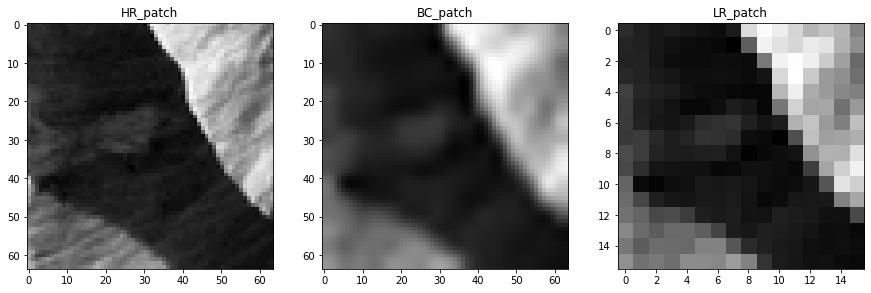

In [ ]:
(HR_patch, LR_patch, BC_patch) = train_dataset[100]
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)
ax1.imshow(HR_patch.squeeze(0).numpy(), cmap='gray')
ax1.set_title("HR_patch")
ax2.imshow(BC_patch.squeeze(0).numpy(), cmap='gray')
ax2.set_title("BC_patch")
ax3.imshow(LR_patch.squeeze(0).numpy(), cmap='gray')
ax3.set_title("LR_patch")
plt.show()

### 1.1 Write codes for the model (FSRCNN) [4 points]

In [ ]:
print('STEP 3: CREATE MODEL CLASS (FSRCNN)')

class FSRCNN(nn.Module):
    def __init__(self, scale_factor = 4):
        super(FSRCNN, self).__init__()
        #############
        # CODE HERE #
        #############        

        # FSRCNN with d = 56, s = 12, m = 4

        # Feature extraction
        # Conv(5, 56, 1) as a feature extraction layer followed by PReLU as a non-linear activation function
        self.feature_extraction = nn.Sequential(
            nn.Conv2d(1, 56, kernel_size=5, stride=1, padding=2),
            nn.PReLU(56)
        )
        
        # shrinking LR feature dimension from 56 to 12
        # Conv(1, 12, 56) as a shrinking layer followed by PReLU as a non-linear activation function
        self.shrinking = nn.Sequential(
            nn.Conv2d(56, 12, kernel_size=1, stride=1),
            nn.PReLU(12)
        )
        
        # non-linear mapping
        # Concatenating Conv(3, 12, 12) layers for non-linear mapping with each followed by PReLU
        self.non_lin_mapping = nn.Sequential(
            nn.Conv2d(12, 12, kernel_size=3, stride=1, padding=1),
            nn.PReLU(12),
            nn.Conv2d(12, 12, kernel_size=3, stride=1, padding=1),
            nn.PReLU(12),
            nn.Conv2d(12, 12, kernel_size=3, stride=1, padding=1),
            nn.PReLU(12),
            nn.Conv2d(12, 12, kernel_size=3, stride=1, padding=1),
            nn.PReLU(12)
        )
        
        # expanding
        # Conv(1, 56, 12) as an expanding layer followed by PReLU as a non-linear activation function
        self.expanding = nn.Sequential(
            nn.Conv2d(12, 56, kernel_size=1, stride=1),
            nn.PReLU(56)
        )
        
        # deconv
        # DeConv(9, 1, 56) as a deconvolution layer which gives the output image, 
        # having the stride as a scale factor 4, padding to be 4 because of filter size, and output padding to be 3
        self.deconvolution = nn.ConvTranspose2d(56, 1, kernel_size=9, stride=scale_factor, padding=4, output_padding=scale_factor-1)
            
    def weight_init(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.normal_(m.weight.data, mean = 0.0, std = 0.02)
#                 nn.init.kaiming_normal_(m.weight.data, a=0.25) # for SGD
                if m.bias is not None:
                    m.bias.data.zero_()
            if isinstance(m, nn.ConvTranspose2d):
                nn.init.normal_(m.weight.data, mean = 0.0, std = 0.001)
                if m.bias is not None:
                    m.bias.data.zero_()
    
    
    def forward(self, LR_patch):
        #############
        # CODE HERE #
        #############
        # input image : 1 (YChannel) x H x W
        # output image: 1 (YChannel) x H*sf x W*sf (sf: scaling factor)

        # defining forward pass by forwarding through each layers of:
        # feature extraction - shrinking - non-linear mapping - expanding - deconvolution layer
        output = self.feature_extraction(LR_patch)
        output = self.shrinking(output)
        output = self.non_lin_mapping(output)
        output = self.expanding(output)
        output = self.deconvolution(output)
        
        return output

STEP 3: CREATE MODEL CLASS (FSRCNN)


In [ ]:
print('STEP 4: INSTANTIATE MODEL CLASS')


model = FSRCNN(scale_factor = scale_factor)
model.weight_init()
num_total_params = sum(p.numel() for p in model.parameters())
print("The number of parameters : ", num_total_params)

#######################
#  USE GPU FOR MODEL  #
#######################
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

STEP 4: INSTANTIATE MODEL CLASS
The number of parameters :  12809


FSRCNN(
  (feature_extraction): Sequential(
    (0): Conv2d(1, 56, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): PReLU(num_parameters=56)
  )
  (shrinking): Sequential(
    (0): Conv2d(56, 12, kernel_size=(1, 1), stride=(1, 1))
    (1): PReLU(num_parameters=12)
  )
  (non_lin_mapping): Sequential(
    (0): Conv2d(12, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): PReLU(num_parameters=12)
    (2): Conv2d(12, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): PReLU(num_parameters=12)
    (4): Conv2d(12, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): PReLU(num_parameters=12)
    (6): Conv2d(12, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): PReLU(num_parameters=12)
  )
  (expanding): Sequential(
    (0): Conv2d(12, 56, kernel_size=(1, 1), stride=(1, 1))
    (1): PReLU(num_parameters=56)
  )
  (deconvolution): ConvTranspose2d(56, 1, kernel_size=(9, 9), stride=(4, 4), padding=(4, 4), output_padding=(3, 3))
)

In [ ]:
print('STEP 5: INSTANTIATE OPTIMIZER CLASS')

lr_conv = 1e-3
lr_deconv = 1e-4
# momentum = 0.9

param_conv = list(model.feature_extraction.parameters())+\
             list(model.shrinking.parameters())+\
             list(model.non_lin_mapping.parameters())+\
             list(model.expanding.parameters())

param_deconv = model.deconvolution.parameters()

# optimizer = torch.optim.SGD([{'params':param_conv},
#                              {'params':param_deconv, 'lr':lr_deconv}],
#                              lr = lr_conv, momentum = momentum)

optimizer = torch.optim.Adam([{'params':param_conv}, 
                             {'params':param_deconv, 'lr':lr_deconv}],
                             lr = lr_conv)

STEP 5: INSTANTIATE OPTIMIZER CLASS


### 1.2 Train the FSRCNN model and print PSNR for every epochs [4 points]

In [ ]:
import time
print('STEP 6: INSTANTIATE LOSS CLASS')
#############
# CODE HERE #
#############

# Using Mean Squared Error as a loss function
criterion = nn.MSELoss()


print('STEP 7: TRAIN THE MODEL')

if not os.path.exists("./weights/"):
    os.mkdir("./weights/")

if not os.path.exists("./weights/lab05/"):
    os.mkdir("./weights/lab05/")

num_epochs = 51

def PSNR(pred, gt, s = 0): # input images : 0~1 normalized / s : scale factor
    if pred.is_cuda:
        pred = pred.cpu()
    if gt.is_cuda:
        gt = gt.cpu()
    pred = pred[:,:,s:-s,s:-s] # shave border
    gt = gt[:,:,s:-s,s:-s]
    pred = pred.clamp(0, 1)
    diff = pred - gt
    mse = np.mean(diff.numpy() ** 2)
    if mse == 0:
        return 100
    return 10 * np.log10(1.0 / mse)

for epoch in range(num_epochs):
    # training stage
    model.train()
    total_loss = 0
    start = time.time()
    for i, (HR_patch, LR_patch, BC_patch) in enumerate(train_loader):
        #############
        # CODE HERE #
        #############
        
        # using GPU for LR and HR images as input and reference, respectively
        LR = LR_patch.to(device)
        HR = HR_patch.to(device)
        
        # clear gradients with respect to parameters
        optimizer.zero_grad()
        
        # forward-passing the FSRCNN model
        pred = model(LR)
        
        # evaluating loss
        loss = criterion(pred, HR)
        
        # getting gradients with respect to parameters
        loss.backward()
        
        # update parameters
        optimizer.step()
        
        # add current loss to the total loss
        total_loss += loss
    
    # test stage
    end = time.time()
    model.eval()
    
    # Calculate PSNR
    total_psnr = 0
    total_psnr_bic = 0
    # Iterate through test dataset
    with torch.no_grad():
        for (HR_img, LR_img, BC_img) in test_loader:
            #############
            # CODE HERE #
            #############
            
            # only using Y channel of ycbcr images by indexing and unsqueezing image tesnor
            LR_img = torch.unsqueeze(LR_img[:, 0, :, :], 0)
            HR_img = torch.unsqueeze(HR_img[:, 0, :, :], 0)
            BC_img = torch.unsqueeze(BC_img[:, 0, :, :], 0)
            
            # using GPU for LR HR, and bicubic-interpolated images
            LR = LR_img.to(device)
            HR = HR_img.to(device)
            BC = BC_img.to(device)
            
            # forward-passing the FSRCNN model
            pred = model(LR)
            
            # adding up the PSNR values of predicted images with cropping the output padding
            total_psnr += PSNR(pred, HR, 4)
            # adding up the PSNR values of bicubic-interpolated images with cropping the output padding
            total_psnr_bic += PSNR(BC, HR, 4)
            
        # calculating the average PSNR value of predicted and bicubic-interpolated images
        total_psnr /= len(test_loader)
        total_psnr_bic /= len(test_loader)
        
        # Print Loss
        print('Epochs: {0}. Loss: {1:.6f}. PSNR: {2:.3f} (bicubic)\t{3:.3f} (FSRCNN)\tElapsed time: {4} sec'.format(epoch, total_loss / (i+1), total_psnr_bic, total_psnr, end-start))
            
    
    # save weights
    if epoch % 5 == 0 and epoch != 0:
        torch.save({'state_dict':model.state_dict()},'./weights/lab05/checkpoint_%03d.pkl'%(epoch))

STEP 6: INSTANTIATE LOSS CLASS
STEP 7: TRAIN THE MODEL
Epochs: 0. Loss: 0.021389. PSNR: 28.432 (bicubic)	25.648 (FSRCNN)	Elapsed time: 18.213844299316406 sec
Epochs: 1. Loss: 0.002873. PSNR: 28.432 (bicubic)	26.458 (FSRCNN)	Elapsed time: 17.248650789260864 sec
Epochs: 2. Loss: 0.002324. PSNR: 28.432 (bicubic)	27.591 (FSRCNN)	Elapsed time: 16.81691575050354 sec
Epochs: 3. Loss: 0.001778. PSNR: 28.432 (bicubic)	28.225 (FSRCNN)	Elapsed time: 16.978833436965942 sec
Epochs: 4. Loss: 0.001629. PSNR: 28.432 (bicubic)	28.538 (FSRCNN)	Elapsed time: 16.791896104812622 sec
Epochs: 5. Loss: 0.001575. PSNR: 28.432 (bicubic)	28.871 (FSRCNN)	Elapsed time: 16.8279709815979 sec
Epochs: 6. Loss: 0.001531. PSNR: 28.432 (bicubic)	28.836 (FSRCNN)	Elapsed time: 17.617359399795532 sec
Epochs: 7. Loss: 0.001493. PSNR: 28.432 (bicubic)	29.125 (FSRCNN)	Elapsed time: 16.6652569770813 sec
Epochs: 8. Loss: 0.001447. PSNR: 28.432 (bicubic)	29.255 (FSRCNN)	Elapsed time: 16.78586459159851 sec
Epochs: 9. Loss: 0.00141

### 1.3 Visualize and compare test examples (RGB color) [2 points]

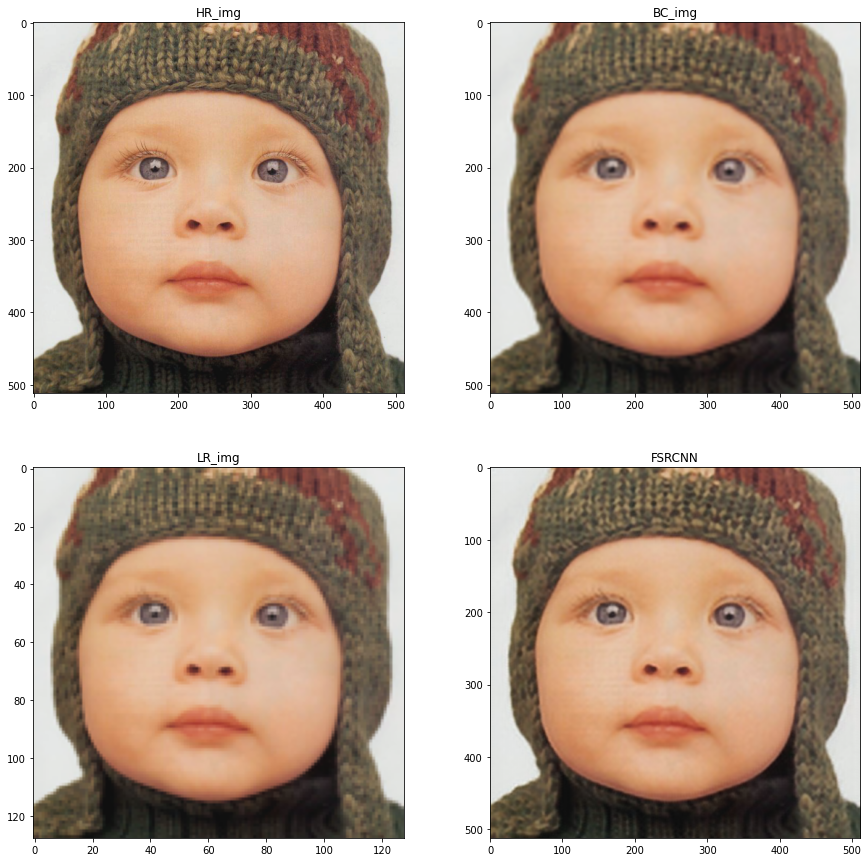

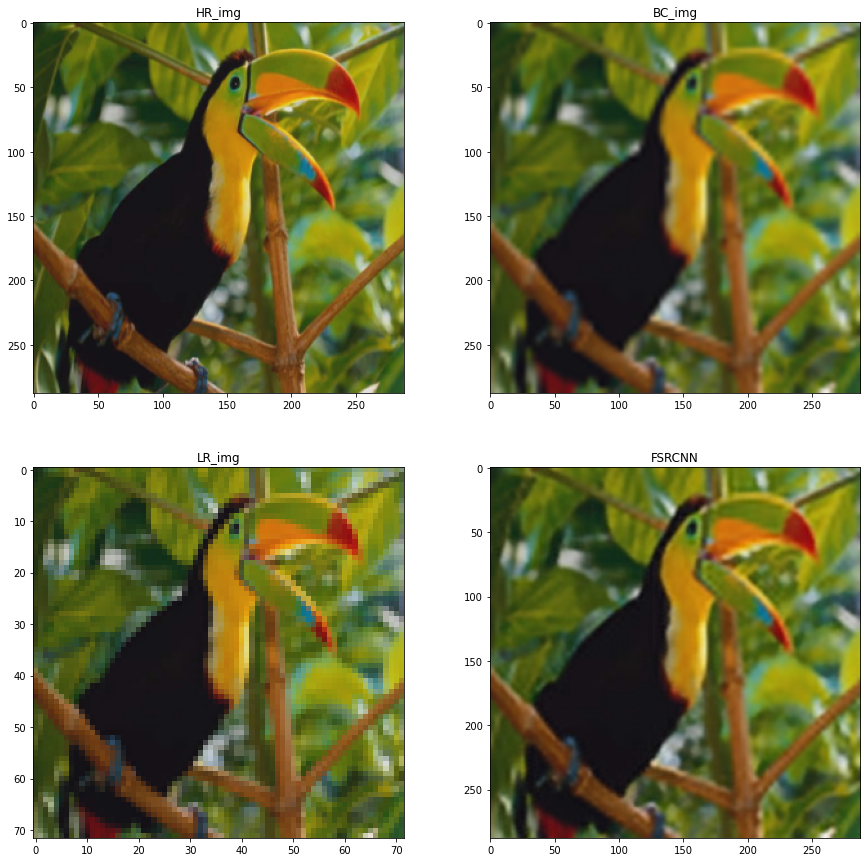

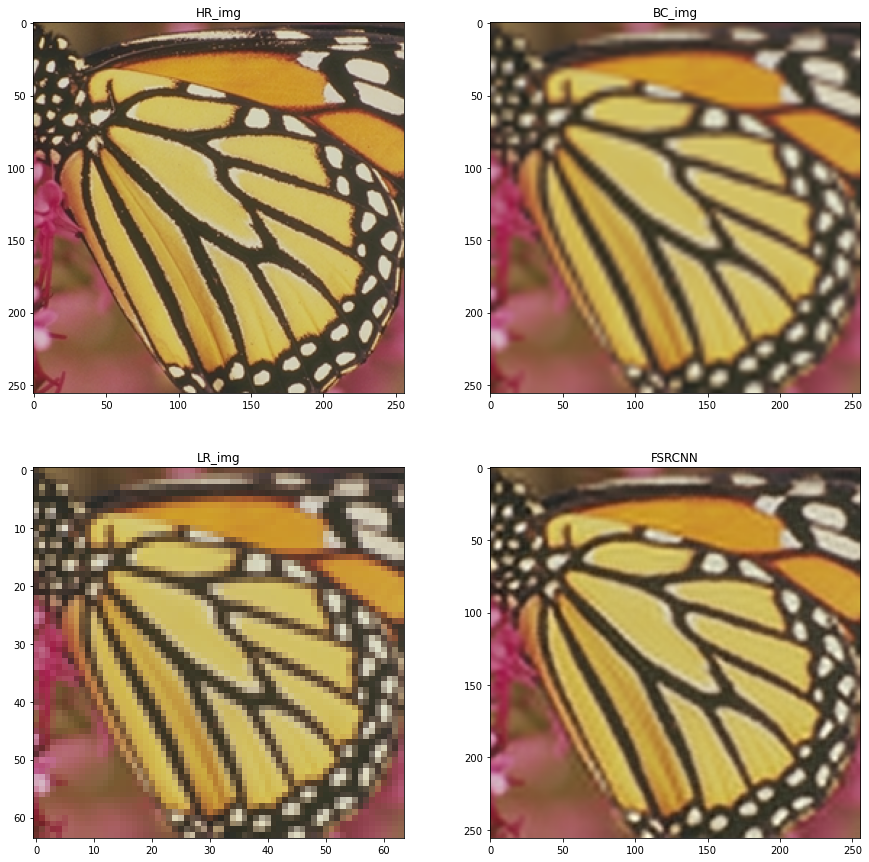

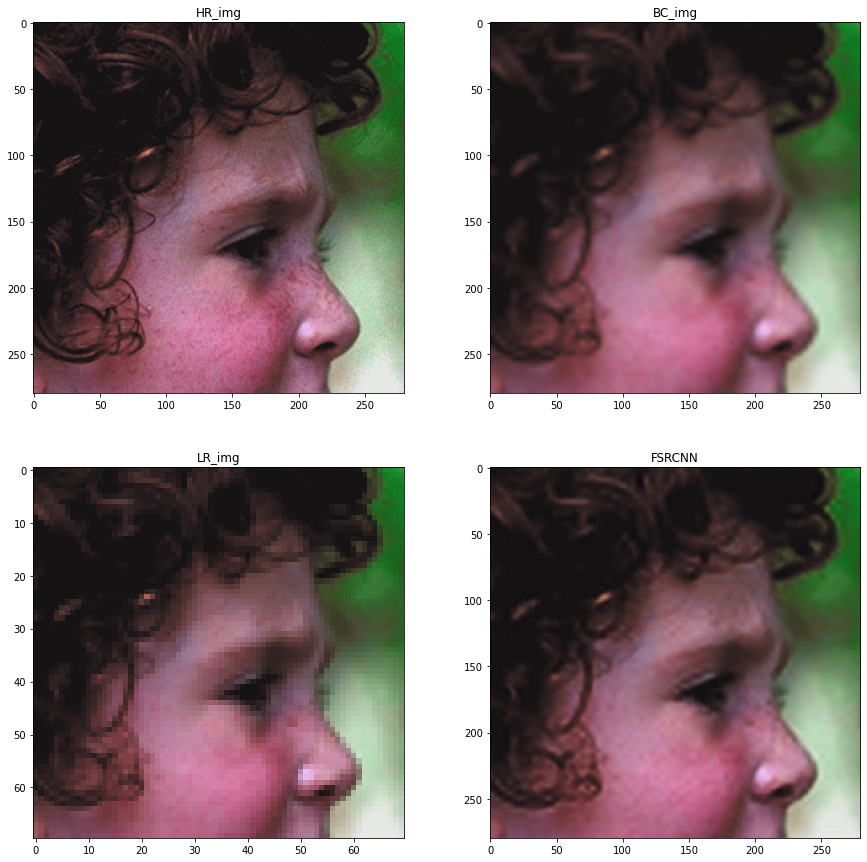

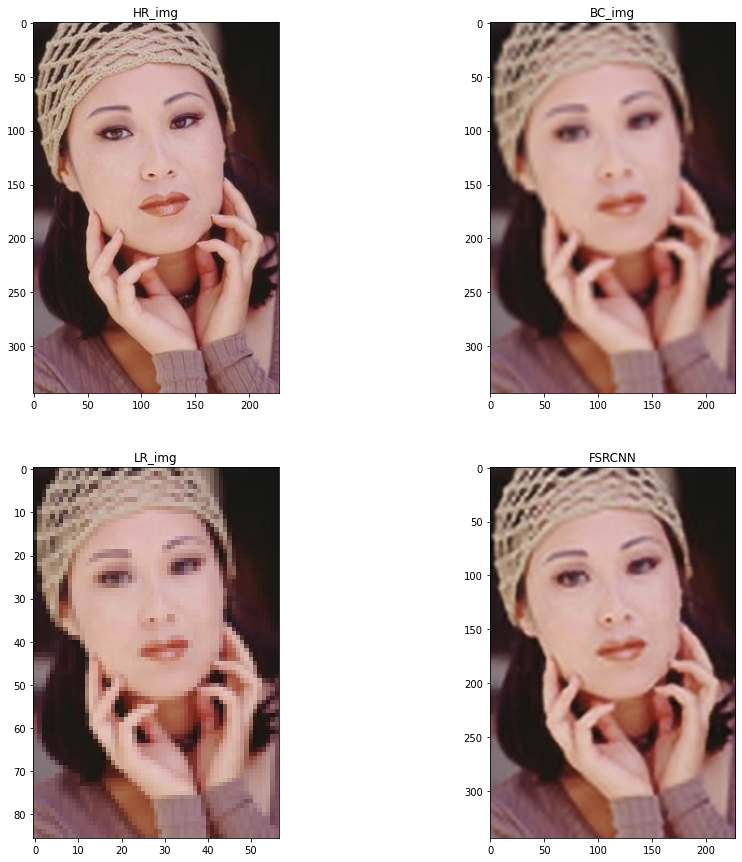

In [ ]:
def ycbcr2rgb(im): # input image : ranges from 0 to 255
    xform = np.array([[1, 0, 1.402], [1, -0.34414, -.71414], [1, 1.772, 0]])
    rgb = im.astype(np.float)
    rgb[:,:,[1,2]] -= 128
    rgb = rgb.dot(xform.T)
    np.putmask(rgb, rgb > 255, 255)
    np.putmask(rgb, rgb < 0, 0)
    return np.uint8(rgb)

trained_weight = torch.load("./weights/lab05/checkpoint_020.pkl")
model.load_state_dict(trained_weight['state_dict'])
model.eval()

with torch.no_grad():
    for (HR_img, LR_img, BC_img) in test_loader:
        #############
        # CODE HERE #
        #############
        # input : 1 x H x W
        # output : 1 x H*sf x W*sf -> 3 x H*sf x W*sf  by getting the Cb and Cr channel from BC images
        
        # only using Y channel of ycbcr images by indexing and unsqueezing image tesnor
        LR = torch.unsqueeze(LR_img[:, 0, :, :], 0).to(device)
        
        # forward-passing the FSRCNN model
        pred = model(LR)
        
        # getting the Cb and Cr channel from BC images to make the predicted image output channel to 3
        FSRCNN = torch.cat((pred.cpu(), BC_img[:, 1, :, :].unsqueeze(0), BC_img[:, 2, :, :].unsqueeze(0)), 1)
        
        # converting the ycbcr type images to rgb type images
        HR_img = ycbcr2rgb(HR_img.squeeze(0).permute(1, 2, 0).numpy()*255)
        LR_img = ycbcr2rgb(LR_img.squeeze(0).permute(1, 2, 0).numpy()*255)
        BC_img = ycbcr2rgb(BC_img.squeeze(0).permute(1, 2, 0).numpy()*255)
        FSRCNN = ycbcr2rgb(FSRCNN.squeeze(0).permute(1, 2, 0).numpy()*255)
        
        # plotting the HR, BC, LR, FSRCNN-predicted images, respectively
        f, subplot = plt.subplots(2, 2, figsize=(15, 15))
        subplot[0, 0].imshow(HR_img)
        subplot[0, 0].set_title("HR_img")
        subplot[0, 1].imshow(BC_img)
        subplot[0, 1].set_title("BC_img")
        subplot[1, 0].imshow(LR_img)
        subplot[1, 0].set_title("LR_img")
        subplot[1, 1].imshow(FSRCNN)
        subplot[1, 1].set_title("FSRCNN")

# Discussion

Model 구조 관련
- FSRCNN에서 주요하게 작용하는 sensitive parameter들은 d = 56, s = 12, m = 4으로 값을 설정하였다. 여기서 d는 LR feature dimension, s는 shrinking level, m은 mapping layer 깊이(개수)에 해당한다. 
- feature extraction - shrinking - non-linear mapping - expanding - deconvolution layer의 단계로 구성되며, feature extraction을 통해 LR feature들을 얻을 수 있으며, shrinking을 통해 LR feature의 크기를 줄여 parameter의 개수와 연산량을 줄이고, non-linear mapping layer 여러 개를 이어 붙임으로써 적은 parameter들로도 LR feature를 효과적으로 학습할 수 있게 되었다. 후에 feature map을 shrinking한 비율만큼 다시 expand 하고, deconvolution을 통해 upsampling에 대한 정보를 학습한다. 현재 모델의 parameter 개수는 12809개 뿐임에도 높은 성능(PSNR 값)을 보인다. 
- 마지막 deconvolution layer를 제외한 모든 convolutional layer 뒤에는 activation function으로 PReLU를 사용하였다. 
- feature extraction에서는 d = 56이므로 56개의 channel을 사용하였고, kernel size 5x5인 convolutional filter를 사용했기 때문에 padding은 2로 설정했고, stride는 1로 설정하였다. 
- shrinking layer에서는 d=56, s=12이기 때문에 input channel=56, output channel=12로 설정하였고, kernel 크기가 1x1이므로 padding은 0이고, 인풋과 아웃풋의 사이즈가 동일하므로 stride는 1로 설정했다.  
- mapping layers는 layer의 개수 m=3이기 때문에 3개의 convolutional layer를 순차적으로 이었고, 각각 stride 1, 3x3 kernel size를 가지므로 padding 1로 설정하였다. 
- expanding layer에서는 shrinking과는 반대의 과정을 통해 feature map이 복원되어야 하기 때문에(d=56, s=12), input channel=12, output channel=56으로 설정해 두었다. 이 layer역시 1x1 kernel size를 갖고 있으므로 padding은 0, stride는 1만큼으로 설정하였다. 
- Deconvolution은 convolution의 input과 output이 반대되는 연산으로 이해할 수 있는데, stride가 1/k인 deconvolution filter를 통과하면 output dimension은 k배 증가하게 된다. 우리는 9 x 9 deconvolution filter를 사용했기 때문에 padding은 9//2 = 4로, 이미지를 4배 크기로 upsampling 시키고 싶기 때문에(scaling factor = 4) stride는 4로 두었다. output padding은 이후 PSNR을 측정할 때 이미지를 crop하는 과정에서 일종의 경계 buffer로 작용하며, 우리 모델에서는 stride=4이기 때문에 3을 적용시켜 주었다. 

실행 결과 관련
- 총 51 epoch에 걸쳐 FSRCNN을 training dataset을 기반으로 training하고, test dataset에 있는 low-resolution 사진들을 추론한 이미지들의 PSNR을 구하여 bicubic interpolation을 한 image들의 PSNR과 비교하였다. Output image들의 평균 PSNR의 최댓값은 30.438로, bicubic interpolation을 한 image의 PSNR 평균값인 28.432을 상회하는 결과를 얻을 수 있었다. 
- 해당 결과는 이미지들을 직접 visualization시켜 육안상으로 비교했을 때 더욱 극명한데, bicubic interpolation된 이미지들은 선명도가 다소 떨어지지만, FSRCNN output 이미지들은 선명도 면에서 더욱 양호하게 복원되었다고 볼 수 있다. 
- 한 epoch 당 training 하는 데 걸린 시간은 약 16~18초 내외이며, training dataset의 크기를 감안한다면 상당히 빠른 속도임을 알 수 있다. 이는 FSRCNN이 기존의 SRCNN과 같이 이미지를 upsampling 시키지 않았기 때문에 (bicubic interpolation 대신 deconvolution layer 사용) n^2배만큼 연산량을 줄일 수 있었고, shrinking and expanding layer를 통해 parameter의 개수를 줄일 수 있었기 때문에 forward & backward pass 속도를 크게 증가시킬 수 있었다. 